In [1]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                           input_length=max_len,
                           name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
__________________________________________________

In [2]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='./logs',
        histogram_freq=1,
        embeddings_freq=1,
)]
history = model.fit(x_train, y_train,
                    epochs=20,
                     batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
  1/157 [..............................] - ETA: 0s - loss: 1.6513 - acc: 0.5156WARNING:tensorflow:From /Users/daniel/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
157/157 [==============================] - 117s 743ms/step - loss: 0.5894 - acc: 0.6788 - val_loss: 0.5243 - val_acc: 0.7934
Epoch 2/20
157/157 [==============================] - 84s 534ms/step - loss: 0.4351 - acc: 0.8475 - val_loss: 0.4664 - val_acc: 0.8522
Epoch 3/20
157/157 [==============================] - 106s 677ms/step - loss: 0.3732 - acc: 0.8781 - val_loss: 0.4174 - val_acc: 0.8694
Epoch 4/20
157/157 [==============================] - 139s 884ms/step - loss: 0.3318 - acc: 0.8969 - val_loss: 0.5207 - val_acc: 0.8620
Epoch 5/20
157/157 [==============================] - 63s 400ms/step - loss: 0.30

## TensorBoard

 `python3.7 -m tensorboard.main --logdir=logs`

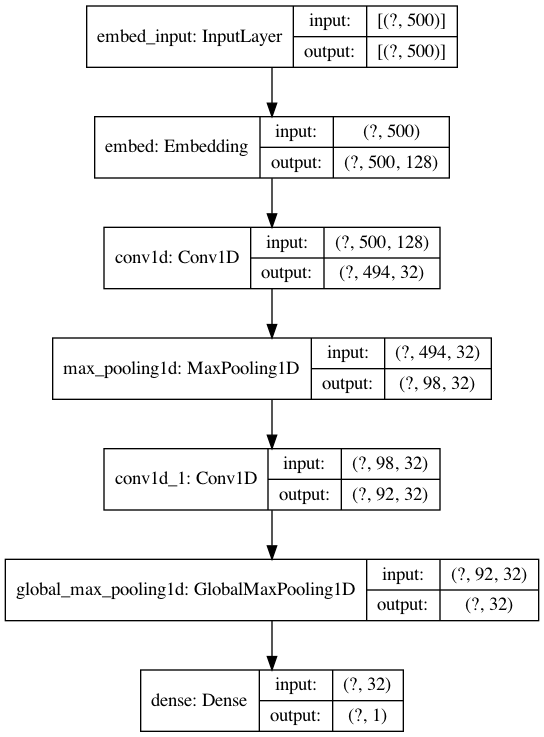

In [6]:
# Plotting model with keras
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')